Learning Objective:

* Demonstrate parallel running of functions

Concepts:

* Dask Client: The method that provids what's called an 'entry point' to dask distributed. Essentially sets up a connection to your cluster/processor and allows the submission of jobs. 
* Dask Distributed: This is the task scheduler for Dask. It coordinates the 'tasks'/functions/jobs across cores or nodes.
* Joblib: Part of scikit-learn, has functions for saving models (like pickle), also has task scheduling. Dask integrates heavily with scikit-learn, see https://ml.dask.org/joblib.html.
* Dask Delayed: A kind of decorator for functions that allows for delaying them (i.e., making them lazy), such that they run in a parallel manner

In [1]:
#import packages
from dask.distributed import Client
from dask import delayed
from time import sleep
import pandas as pd
from dask import dataframe as dd
import numpy as np

In [2]:
#import the dataset
dataframe = pd.read_csv('/Users/lindseyclark/Documents/formula_1_project/formula-1-race-data-19502017/lapTimes.csv')
#Convert the dataset to a dask dataframe
dataframe_dask = dd.from_pandas(dataframe, npartitions=8) 

In [3]:
#Instantiate the client
client = Client(n_workers=4)

In [4]:
#define some transformation functions
def create_split_cols1(dataframe):
    sleep(1)
    split_cols1 = dataframe.time.apply(lambda x: pd.Series(str(x).split(".")))
    split_cols1['raceId'] = dataframe['raceId']
    return split_cols1
def create_split_cols2(dataframe):
    sleep(1)
    split_cols2 = dataframe.time.apply(lambda x: pd.Series(str(x).split(":")))
    split_cols2['raceId'] = dataframe['raceId']
    return split_cols2
def print_results(x,y):
    print(x)
    print(y)

In [ ]:
#Let's run this in parallel!

In [6]:
%%time 

x = create_split_cols1(dataframe)
y = create_split_cols2(dataframe)

CPU times: user 2min 50s, sys: 4.99 s, total: 2min 55s
Wall time: 2min 54s


In [ ]:
#That ran for close to 3 minutes. Now, let's get parallel

In [7]:
%%time

x = delayed(create_split_cols1)(dataframe)
y = delayed(create_split_cols2)(dataframe)
z = delayed(print_results)(x, y)

CPU times: user 69.5 ms, sys: 38 ms, total: 108 ms
Wall time: 107 ms


In [8]:
%%time
z.compute()

/Users/lindseyclark/Documents/neural_net_projects/venv_reg/lib/python3.7/site-packages/distributed/worker.py:3390: UserWarning: Large object of size 19.06 MB detected in task graph: 
  (        raceId  driverId  lap  position2     time ...  x 6 columns],)
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  % (format_bytes(len(b)), s)


CPU times: user 2.29 s, sys: 356 ms, total: 2.64 s
Wall time: 1min 30s


In [ ]:
#That ran for half the time, 1 min 30 seconds, because we are running 2 tasks at once, instead of in series. 

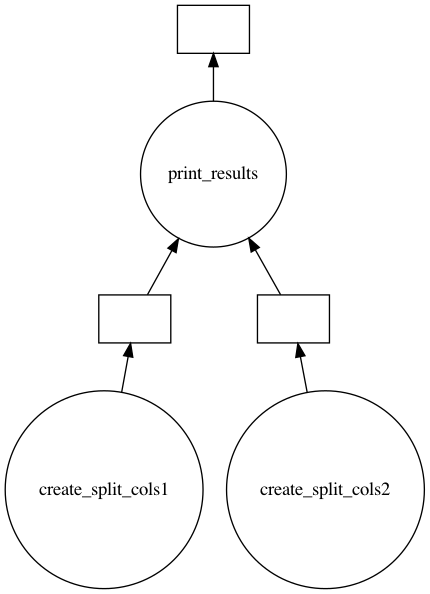

In [9]:
#needed to brew install graphviz
z.visualize()

In [10]:
client.close()